In [1]:
import pandas as pd
import numpy as np

## Load dataset

In [2]:
df_artists = pd.read_csv('./collection/Artists.csv')

### Explore Artist dataset

In [3]:
df_artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


**Shape and columns name of the dataset**

In [4]:
df_artists.shape

(16029, 9)

**Columns with NaN**

In [5]:
df_artists.isnull().any()

ConstituentID    False
DisplayName      False
ArtistBio         True
Nationality       True
Gender            True
BeginDate        False
EndDate          False
Wiki QID          True
ULAN              True
dtype: bool

**Genre distribution**

In [ ]:
df_artists['Gender'] = df_artists['Gender'].str.replace('male', 'Male')
df_artists['Gender'].dropna().value_counts().plot.bar()

**Nationality distribution**

In [ ]:
#Group nationalities that have less than n 
n= 100

nationalities = df_artists['Nationality'].value_counts()
nationalities_lessthan = nationalities[nationalities < n]
nationalities_morethan = nationalities[nationalities >= n]
nationalities_lessthan.head()

In [ ]:
#nationalities_morethan['Others'] = nationalities_lessthan.sum()
nationalities_morethan.sort_values().plot.bar()

In [ ]:
nationalities_morethan.hist(bins=100)

**Begin day distribution**

In [ ]:
#There outliers with begin date equals to 0

df_artists['BeginDate'][df_artists['BeginDate'] > 0].hist(bins=50)

**Artist wikidata QID**

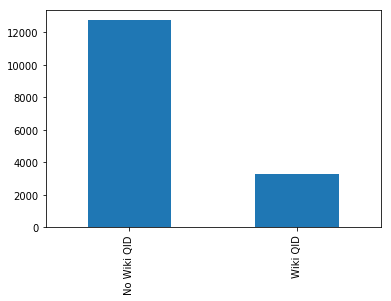

In [8]:
df_artists['Wiki QID'].isnull().value_counts().rename({True:'No Wiki QID', False:'Wiki QID'}).plot.bar()

In [7]:
df_artist_wiki = df_artists.dropna(subset=['Wiki QID'])
df_artist_wiki.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
7,9,David Aronson,"American, born Lithuania 1923",American,Male,1923,0,Q5230870,500003363.0
8,10,Irene Aronson,"American, born Germany 1918",American,Female,1918,0,Q19748568,500042413.0
9,11,Jean (Hans) Arp,"French, born Germany (Alsace). 1886–1966",French,Male,1886,1966,Q153739,500031000.0
15,19,Richard Artschwager,"American, 1923–2013",American,Male,1923,2013,Q568262,500114981.0


In [9]:
df_artist_wiki.shape

(3288, 9)

In [10]:
import pywikibot

In [37]:
site = pywikibot.Site("wikidata", "wikidata")
repo = site.data_repository()
item = pywikibot.ItemPage(repo, df_artist_wiki['Wiki QID'][3])
dir(item)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_cache_attrs',
 '_cmpkey',
 '_cosmetic_changes_hook',
 '_defined_by',
 '_diff_to',
 '_getInternals',
 '_get_parsed_page',
 '_latest_cached_revision',
 '_link',
 '_namespace',
 '_normalizeData',
 '_normalizeLanguages',
 '_revisions',
 '_save',
 'addClaim',
 'applicable_protections',
 'aslink',
 'autoFormat',
 'backlinks',
 'botMayEdit',
 'canBeEdited',
 'categories',
 'change_category',
 'clear_cache',
 'concept_uri',
 'concept_url',
 'content_model',
 'contributingUsers',
 'contributors',
 'coordinates',
 'create_short_link',
 'data_item',
 'data_repository',
 'defaultsort',
 'delete',
 'depth',
 'editAliases',
 'editDescripti

In [39]:
item.properties()

{'wb-claims': '43', 'wb-identifiers': '26', 'wb-sitelinks': '2'}

In [12]:
item_dict = item.get() #Get the item dictionary
clm_dict = item_dict["claims"] # Get the claim dictionary
print(clm_dict.keys())

dict_keys(['P3544', 'P3782', 'P268', 'P269', 'P166', 'P650', 'P6379', 'P106', 'P213', 'P2042', 'P3372', 'P3430', 'P69', 'P1988', 'P4200', 'P214', 'P2252', 'P21', 'P569', 'P19', 'P6714', 'P2163', 'P244', 'P5597', 'P5273', 'P2174', 'P227', 'P245', 'P1344', 'P2843', 'P27', 'P4927', 'P1795', 'P735', 'P31', 'P3603', 'P6578'])


In [40]:
item_dict.keys()

dict_keys(['claims', 'aliases', 'sitelinks', 'descriptions', 'labels'])

In [46]:
item_dict['aliases']

{'de': ['Chuck Arnoldi'],
 'en': ['Charles Arthur Arnoldi', 'Chuck Arnoldi'],
 'nl': ['Charles Arthur Arnoldi', 'Chuck Arnoldi']}

In [26]:
for clm in clm_dict['P19']:
    print(clm.toJSON())
    clm_trgt = clm.getTarget()
    print(clm_trgt)
    print(type(clm_trgt))
    print(dir(clm_trgt))

{'type': 'statement', 'mainsnak': {'snaktype': 'value', 'datavalue': {'type': 'wikibase-entityid', 'value': {'numeric-id': 34739, 'entity-type': 'item'}}, 'datatype': 'wikibase-item', 'property': 'P19'}, 'rank': 'normal', 'id': 'Q1063584$8E37030F-FE54-45E5-89B3-87971A0FE950', 'references': [{'hash': 'fa278ebfc458360e5aed63d5058cca83c46134f1', 'snaks': {'P143': [{'snaktype': 'value', 'datavalue': {'type': 'wikibase-entityid', 'value': {'numeric-id': 328, 'entity-type': 'item'}}, 'datatype': 'wikibase-item', 'property': 'P143'}]}, 'snaks-order': ['P143']}]}
[[wikidata:Q34739]]
<class 'pywikibot.page.ItemPage'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_cache_attrs', '_cmpkey', '_cosmetic_changes

In [35]:
for clm in clm_dict['P19']:
    clm_trgt = clm.getTarget()
    print(clm_trgt.title())

Q34739


In [56]:
print(clm_dict['P19'][0].getTarget())
print(clm_dict['P19'][0].sources[0])

[[wikidata:Q34739]]
OrderedDict([('P143', [Claim.fromJSON(DataSite("wikidata", "wikidata"), {'hash': 'fa278ebfc458360e5aed63d5058cca83c46134f1', 'snaktype': 'value', 'datavalue': {'type': 'wikibase-entityid', 'value': {'numeric-id': 328, 'entity-type': 'item'}}, 'datatype': 'wikibase-item', 'property': 'P143'})])])
